In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
features_train = pd.read_csv("dengue_features_train.csv")

In [4]:
labels_train = pd.read_csv("dengue_labels_train.csv")

In [5]:
features_test = pd.read_csv("dengue_features_test.csv")

In [6]:
features_train.shape

(1456, 24)

In [7]:
features_test.shape

(416, 24)

In [8]:
labels_train.shape

(1456, 4)

In [9]:
features_train.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [10]:
train = pd.merge(features_train, labels_train, on=['city','year','weekofyear'])

In [11]:
train.shape

(1456, 25)

In [12]:
train.head(5)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [13]:
del train['week_start_date']

In [14]:
train.columns

Index(['city', 'year', 'weekofyear', 'ndvi_ne', 'ndvi_nw', 'ndvi_se',
       'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'total_cases'],
      dtype='object')

In [15]:
train['reanalysis_air_temp_k'] = train['reanalysis_air_temp_k'] - 273.15

In [16]:
train['reanalysis_avg_temp_k'] = train['reanalysis_avg_temp_k'] - 273.15

In [17]:
train['reanalysis_dew_point_temp_k'] = train['reanalysis_dew_point_temp_k'] - 273.15

In [18]:
train['reanalysis_max_air_temp_k'] = train['reanalysis_max_air_temp_k'] - 273.15

In [19]:
train['reanalysis_min_air_temp_k'] = train['reanalysis_min_air_temp_k'] - 273.15

In [20]:
train['reanalysis_tdtr_k'] = train['reanalysis_tdtr_k'] - 273.15

In [21]:
train.head()

,city,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,0.122600,0.103725,0.198483,0.177617,12.42,24.422857,24.592857,...,73.365714,12.42,14.012857,-270.521429,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,0.169900,0.142175,0.162357,0.155486,22.82,25.061429,25.292857,...,77.368571,22.82,15.372857,-270.778571,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,0.032250,0.172967,0.157200,0.170843,34.54,25.631429,25.728571,...,82.052857,34.54,16.848571,-270.850000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,0.128633,0.245067,0.227557,0.235886,15.36,25.837143,26.078571,...,80.337143,15.36,16.672857,-270.721429,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,0.196200,0.262200,0.251200,0.247340,7.52,26.368571,26.514286,...,80.460000,7.52,17.210000,-270.135714,28.942857,9.371429,35.0,23.9,5.8,6


In [22]:
sj_train = train[train['city'] == 'sj']

In [23]:
iq_train = train[train['city'] == 'iq']

In [24]:
sj_train.shape

(936, 24)

In [25]:
iq_train.shape

(520, 24)

In [26]:
sj_train.describe()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
count,936.000000,936.000000,745.000000,887.000000,917.000000,917.000000,927.000000,930.000000,930.000000,930.000000,...,930.000000,927.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,936.000000
mean,1998.826923,26.503205,0.057925,0.067469,0.177655,0.165956,35.470809,26.013653,26.126920,21.959519,...,78.568181,35.470809,16.552409,-270.633733,27.006528,6.757373,31.607957,22.600645,26.785484,34.180556
std,5.212076,15.021909,0.107153,0.092479,0.057166,0.056073,44.606137,1.236429,1.218637,1.569943,...,3.389488,44.606137,1.560923,0.498892,1.415473,0.835993,1.717297,1.506277,29.325811,51.381372
min,1990.000000,1.000000,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,22.788571,22.964286,16.492857,...,66.735714,0.000000,11.715714,-271.792857,22.842857,4.528571,26.700000,17.800000,0.000000,0.000000
25%,1994.000000,13.750000,0.004500,0.016425,0.139283,0.129157,0.000000,25.045000,25.150000,20.697857,...,76.246071,0.000000,15.236429,-270.992857,25.842857,6.200000,30.600000,21.700000,6.825000,9.000000
50%,1999.000000,26.500000,0.057700,0.068075,0.177186,0.165971,20.800000,26.104286,26.228571,22.314286,...,78.667857,20.800000,16.845714,-270.692857,27.228571,6.757143,31.700000,22.800000,17.750000,19.000000
75%,2003.000000,39.250000,0.111100,0.115200,0.212557,0.202771,52.180000,26.982857,27.078571,23.268929,...,80.963214,52.180000,17.858571,-270.350000,28.185714,7.285714,32.800000,23.900000,35.450000,37.000000
max,2008.000000,53.000000,0.493400,0.437100,0.393129,0.381420,390.600000,29.050000,29.014286,24.645714,...,87.575714,390.600000,19.440000,-268.721429,30.071429,9.914286,35.600000,25.600000,305.900000,461.000000


In [27]:
sj_train.describe(include=[object])

,city
count,936
unique,1
top,sj
freq,936


In [28]:
sj_train.head()

,city,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,0.122600,0.103725,0.198483,0.177617,12.42,24.422857,24.592857,...,73.365714,12.42,14.012857,-270.521429,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,0.169900,0.142175,0.162357,0.155486,22.82,25.061429,25.292857,...,77.368571,22.82,15.372857,-270.778571,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,0.032250,0.172967,0.157200,0.170843,34.54,25.631429,25.728571,...,82.052857,34.54,16.848571,-270.850000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,0.128633,0.245067,0.227557,0.235886,15.36,25.837143,26.078571,...,80.337143,15.36,16.672857,-270.721429,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,0.196200,0.262200,0.251200,0.247340,7.52,26.368571,26.514286,...,80.460000,7.52,17.210000,-270.135714,28.942857,9.371429,35.0,23.9,5.8,6


In [29]:
iq_train.shape

(520, 24)

In [30]:
del iq_train['city']

In [31]:
iq_train.shape

(520, 23)

In [32]:
iq_train.isnull().sum()

year                                      0
weekofyear                                0
ndvi_ne                                   3
ndvi_nw                                   3
ndvi_se                                   3
ndvi_sw                                   3
precipitation_amt_mm                      4
reanalysis_air_temp_k                     4
reanalysis_avg_temp_k                     4
reanalysis_dew_point_temp_k               4
reanalysis_max_air_temp_k                 4
reanalysis_min_air_temp_k                 4
reanalysis_precip_amt_kg_per_m2           4
reanalysis_relative_humidity_percent      4
reanalysis_sat_precip_amt_mm              4
reanalysis_specific_humidity_g_per_kg     4
reanalysis_tdtr_k                         4
station_avg_temp_c                       37
station_diur_temp_rng_c                  37
station_max_temp_c                       14
station_min_temp_c                        8
station_precip_mm                        16
total_cases                     

In [33]:
iq_train.fillna(iq_train.mean(), inplace=True)

/anaconda3/lib/python3.5/site-packages/pandas/core/generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [34]:
iq_train.isnull().sum()

year                                     0
weekofyear                               0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_precip_mm                        0
total_cases                              0
dtype: int6

In [35]:
import matplotlib.pyplot as plt

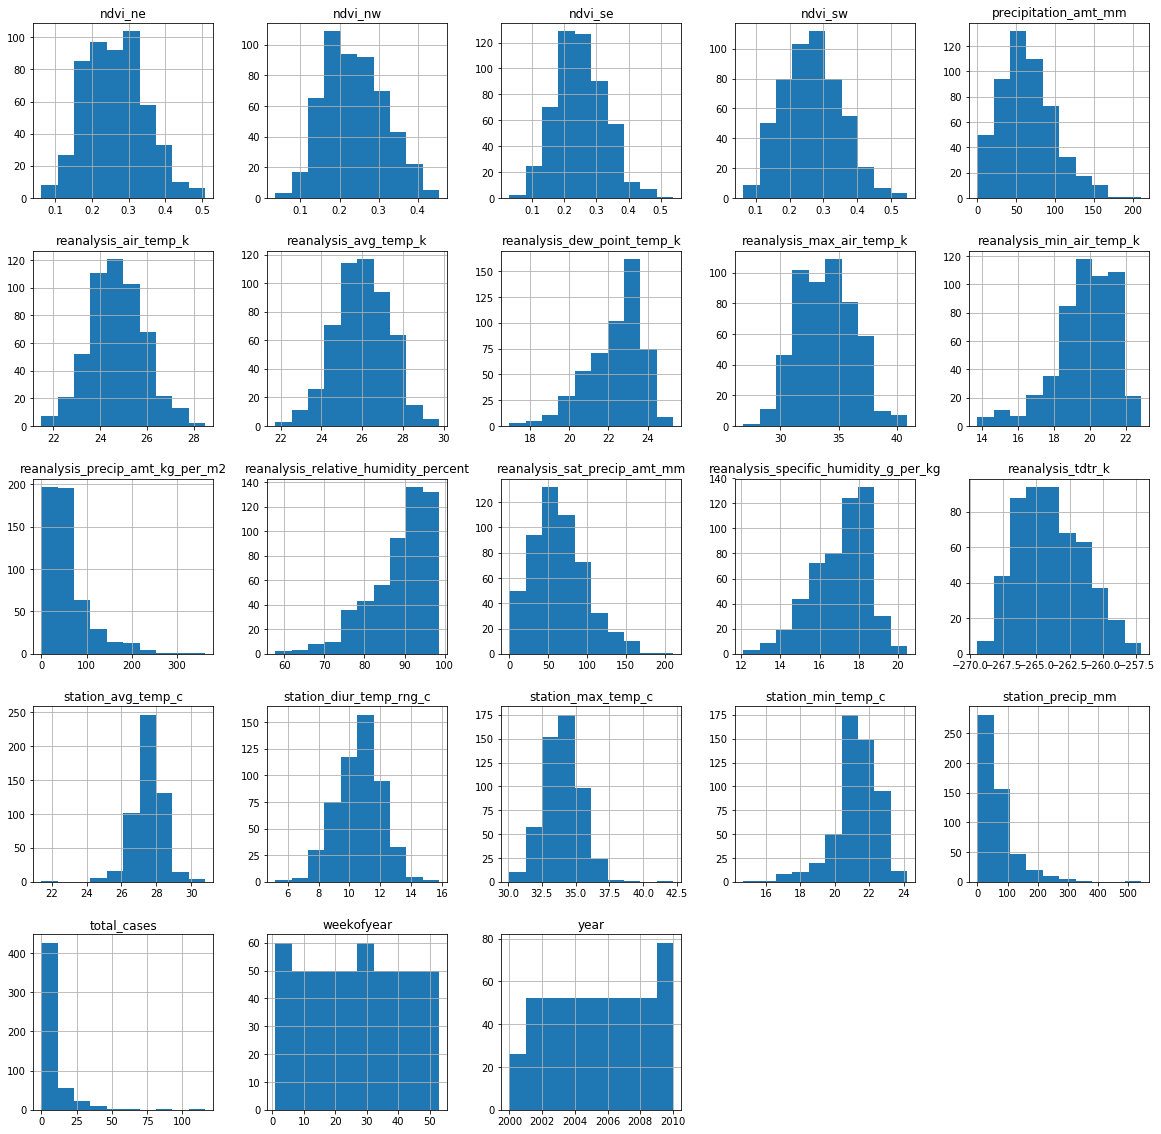

In [36]:
iq_train.hist(figsize=(20,20))
plt.show()

In [37]:
iq_train.columns

Index(['year', 'weekofyear', 'ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw',
       'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'total_cases'],
      dtype='object')

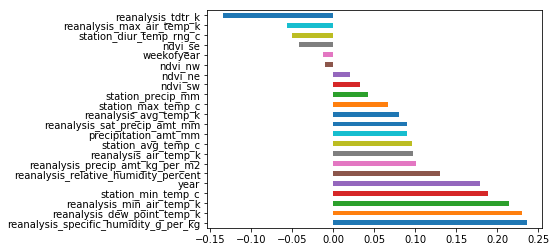

In [38]:
import seaborn as sns
iq_correlations = iq_train.corr()
(iq_correlations
     .total_cases
     .drop('total_cases') # don't compare with myself
     .sort_values(ascending=False)
     .plot
     .barh())

In [39]:
del iq_train['reanalysis_tdtr_k']
del iq_train['reanalysis_max_air_temp_k']
del iq_train['station_diur_temp_rng_c']
del iq_train['ndvi_se']
del iq_train['weekofyear']
del iq_train['ndvi_nw']
del iq_train['ndvi_ne']
del iq_train['ndvi_sw']
del iq_train['station_precip_mm']
del iq_train['year']
del iq_train['station_min_temp_c']
del iq_train['reanalysis_min_air_temp_k']
del iq_train['reanalysis_dew_point_temp_k']
del iq_train['reanalysis_specific_humidity_g_per_kg']

In [40]:
iq_train.shape

(520, 9)

In [41]:
iq_train.columns

Index(['precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'station_avg_temp_c', 'station_max_temp_c', 'total_cases'],
      dtype='object')

In [42]:
X_iq = iq_train.iloc[:, 0:8].values

In [43]:
y_iq = iq_train.iloc[:,8].values

In [44]:
X_iq.shape

(520, 8)

In [46]:
y_iq.shape

(520,)

In [47]:
from sklearn.preprocessing import MinMaxScaler

In [48]:
scaler = MinMaxScaler()

In [49]:
X_iq = scaler.fit_transform(X_iq)

In [50]:
X_iq

array([[0.12052364, 0.30055091, 0.44266667, ..., 0.12052364, 0.53191489,
        0.19834711],
       [0.28748281, 0.28545195, 0.44      , ..., 0.28748281, 0.58510638,
        0.32231405],
       [0.26334013, 0.25423383, 0.31111111, ..., 0.26334013, 0.57446809,
        0.23966942],
       ...,
       [0.27956173, 0.28035095, 0.336     , ..., 0.27956173, 0.31914894,
        0.17355372],
       [0.28302424, 0.24423587, 0.32711111, ..., 0.28302424, 0.42907801,
        0.09090909],
       [0.29986245, 0.4943889 , 0.61511111, ..., 0.29986245, 0.6462766 ,
        0.29752066]])

In [51]:
from sklearn.linear_model import BayesianRidge

In [53]:
iq_model = BayesianRidge?

In [ ]:
iq_model = BayesianRidge

In [54]:
iq_model = BayesianRidge()

In [55]:
iq_model.fit(X_iq, y_iq)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False)

In [91]:
iq_train = scaler.fit_transform(sj_train)

In [76]:
from sklearn.ensemble import RandomForestRegressor

In [104]:
model = RandomForestRegressor?

In [77]:
model = RandomForestRegressor(n_estimators=10, random_state=0)

In [78]:
model.fit(X_iq, y_iq)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [56]:
features_test.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,2008-04-29,-0.0189,-0.018900,0.102729,0.091200,78.60,298.492857,...,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008,19,2008-05-06,-0.0180,-0.012400,0.082043,0.072314,12.56,298.475714,...,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,sj,2008,20,2008-05-13,-0.0015,NaN,0.151083,0.091529,3.66,299.455714,...,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,sj,2008,21,2008-05-20,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,...,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,sj,2008,22,2008-05-27,0.0568,0.039833,0.062267,0.075914,0.76,299.780000,...,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1


In [57]:
del features_test['week_start_date']

In [58]:
features_test['reanalysis_air_temp_k'] = features_test['reanalysis_air_temp_k'] - 273.15

In [59]:
features_test['reanalysis_avg_temp_k'] = features_test['reanalysis_avg_temp_k'] - 273.15

In [60]:
features_test['reanalysis_dew_point_temp_k'] = features_test['reanalysis_dew_point_temp_k'] - 273.15

In [61]:
features_test['reanalysis_max_air_temp_k'] = features_test['reanalysis_max_air_temp_k'] - 273.15

In [62]:
features_test['reanalysis_min_air_temp_k'] = features_test['reanalysis_min_air_temp_k'] - 273.15

In [63]:
features_test['reanalysis_tdtr_k'] = features_test['reanalysis_tdtr_k'] - 273.15

In [64]:
iq_test = features_test[features_test.city == 'iq']

In [65]:
iq_test.shape

(156, 23)

In [67]:
del iq_test['city']

In [68]:
iq_test.isnull().sum()

year                                      0
weekofyear                                0
ndvi_ne                                   0
ndvi_nw                                   0
ndvi_se                                   0
ndvi_sw                                   0
precipitation_amt_mm                      0
reanalysis_air_temp_k                     0
reanalysis_avg_temp_k                     0
reanalysis_dew_point_temp_k               0
reanalysis_max_air_temp_k                 0
reanalysis_min_air_temp_k                 0
reanalysis_precip_amt_kg_per_m2           0
reanalysis_relative_humidity_percent      0
reanalysis_sat_precip_amt_mm              0
reanalysis_specific_humidity_g_per_kg     0
reanalysis_tdtr_k                         0
station_avg_temp_c                       10
station_diur_temp_rng_c                  10
station_max_temp_c                        1
station_min_temp_c                        7
station_precip_mm                         3
dtype: int64

In [69]:
iq_test.fillna(iq_test.mean(), inplace=True)

/anaconda3/lib/python3.5/site-packages/pandas/core/generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [70]:
iq_test.drop(['reanalysis_tdtr_k','reanalysis_max_air_temp_k','station_diur_temp_rng_c','ndvi_se','weekofyear',
              'ndvi_nw','ndvi_ne','ndvi_sw','station_precip_mm','year','station_min_temp_c','reanalysis_min_air_temp_k',
              'reanalysis_dew_point_temp_k','reanalysis_specific_humidity_g_per_kg'], axis=1, inplace=True)

/anaconda3/lib/python3.5/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [71]:
iq_test.shape

(156, 8)

In [72]:
iq_test = scaler.transform(iq_test)

In [73]:
iq_test.shape

(156, 8)

In [74]:
iq_pred = iq_model.predict(iq_test)

In [75]:
np.savetxt("IQ_Bayesian_predictions.csv", iq_pred, delimiter=",")

In [79]:
iq_pred_randomforest = model.predict(iq_test)

In [80]:
np.savetxt("IQ_RANDOMFOREST.csv", iq_pred_randomforest, delimiter=",")

In [58]:
iq_train.shape

(520, 25)

In [59]:
iq_train.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
936,iq,2000,26,2000-07-01,0.192886,0.132257,0.340886,0.247200,25.41,296.740000,...,92.418571,25.41,16.651429,8.928571,26.400000,10.775000,32.5,20.7,3.0,0
937,iq,2000,27,2000-07-08,0.216833,0.276100,0.289457,0.241657,60.61,296.634286,...,93.581429,60.61,16.862857,10.314286,26.900000,11.566667,34.0,20.8,55.6,0
938,iq,2000,28,2000-07-15,0.176757,0.173129,0.204114,0.128014,55.52,296.415714,...,95.848571,55.52,17.120000,7.385714,26.800000,11.466667,33.0,20.7,38.1,0
939,iq,2000,29,2000-07-22,0.227729,0.145429,0.254200,0.200314,5.60,295.357143,...,87.234286,5.60,14.431429,9.114286,25.766667,10.533333,31.5,14.7,30.0,0
940,iq,2000,30,2000-07-29,0.328643,0.322129,0.254371,0.361043,62.76,296.432857,...,88.161429,62.76,15.444286,9.500000,26.600000,11.480000,33.3,19.1,4.0,0


In [60]:
del iq_train['week_start_date']

In [61]:
del iq_train['city']

In [62]:
iq_train.shape

(520, 23)

In [65]:
iq_train.isnull().sum()

year                                     0
weekofyear                               0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_precip_mm                        0
total_cases                              0
dtype: int6

In [64]:
iq_train.fillna(method="ffill", inplace=True)

/anaconda3/lib/python3.5/site-packages/pandas/core/frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [66]:
X_iq = iq_train.iloc[:,0:22].values

In [67]:
y_iq = iq_train.iloc[:,22].values

In [68]:
X_iq.shape

(520, 22)

In [69]:
y_iq.shape

(520,)

In [70]:
from sklearn.preprocessing import MinMaxScaler

In [71]:
scaler_2 = MinMaxScaler()

In [72]:
X_iq = scaler_2.fit_transform(X_iq)

In [73]:
X_iq

array([[0.        , 0.48076923, 0.29366044, ..., 0.19834711, 0.63157895,
        0.00552181],
       [0.        , 0.5       , 0.34727905, ..., 0.32231405, 0.64210526,
        0.10233757],
       [0.        , 0.51923077, 0.25754855, ..., 0.23966942, 0.63157895,
        0.070127  ],
       ...,
       [1.        , 0.42307692, 0.41495005, ..., 0.17355372, 0.47368421,
        0.01362047],
       [1.        , 0.44230769, 0.60942307, ..., 0.09090909, 0.66315789,
        0.02944966],
       [1.        , 0.46153846, 0.52942684, ..., 0.29752066, 0.78947368,
        0.03754832]])

In [74]:
from sklearn.decomposition import PCA

In [79]:
pca_2 = PCA(n_components=18)

In [80]:
X_iq = pca_2.fit_transform(X_iq)

In [78]:
total = sum(pca_2.explained_variance_)
l = 0
cur_var = 0 
while cur_var / total < 0.999:
    cur_var += pca_2.explained_variance_[l]
    l = l+1
l

18

In [81]:
X_iq.shape

(520, 18)

In [83]:
regressor_iq = XGBRegressor()

In [84]:
regressor_iq.fit(X_iq, y_iq)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [85]:
features_test.shape

(416, 24)

In [86]:
features_test.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,2008-04-29,-0.0189,-0.018900,0.102729,0.091200,78.60,298.492857,...,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008,19,2008-05-06,-0.0180,-0.012400,0.082043,0.072314,12.56,298.475714,...,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,sj,2008,20,2008-05-13,-0.0015,NaN,0.151083,0.091529,3.66,299.455714,...,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,sj,2008,21,2008-05-20,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,...,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,sj,2008,22,2008-05-27,0.0568,0.039833,0.062267,0.075914,0.76,299.780000,...,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1


In [87]:
del features_test['week_start_date']

In [90]:
sj_test = features_test[features_test['city'] == 'sj']

In [91]:
iq_test = features_test[features_test['city'] == 'iq']

In [92]:
del sj_test['city']

In [93]:
sj_test.fillna(method="ffill", inplace=True)

/anaconda3/lib/python3.5/site-packages/pandas/core/frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [94]:
sj_test = scaler.transform(sj_test)

In [95]:
sj_test

array([[1.        , 0.32692308, 0.43055633, ..., 0.74157303, 0.5       ,
        0.24583197],
       [1.        , 0.34615385, 0.43155672, ..., 0.37078652, 0.56410256,
        0.11212815],
       [1.        , 0.36538462, 0.44989718, ..., 0.68539326, 0.64102564,
        0.00980713],
       ...,
       [1.27777778, 0.26923077, 0.320847  , ..., 0.68539326, 0.70512821,
        0.030729  ],
       [1.27777778, 0.28846154, 0.54354471, ..., 0.56179775, 0.78205128,
        0.07486107],
       [1.27777778, 0.30769231, 0.35452676, ..., 0.49438202, 0.5       ,
        0.1552795 ]])

In [96]:
sj_test = pca.transform(sj_test)

In [97]:
sj_test.shape

(260, 18)

In [98]:
sj_pred = regressor_sj.predict(sj_test)

In [99]:
del iq_test['city']

In [100]:
iq_test.fillna(method="ffill", inplace=True)

/anaconda3/lib/python3.5/site-packages/pandas/core/frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [101]:
iq_test = scaler_2.transform(iq_test)

In [102]:
iq_test = pca_2.transform(iq_test)

In [103]:
iq_test.shape

(156, 18)

In [104]:
iq_pred = regressor_iq.predict(iq_test)

In [105]:
np.savetxt("SanJuanPredictions.csv", sj_pred, delimiter=",")

In [106]:
np.savetxt("IquitosPredictions.csv", iq_pred, delimiter=",")